In [1]:
# @title Setup
from google.cloud import bigquery
from google.colab import data_table
import bigframes.pandas as bpd

project = 'first-dbt-project-test123' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=first-dbt-project-test123:US:bquxjob_1ec5a4cc_1990aa9e1ed)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_1ec5a4cc_1990aa9e1ed') # Job ID inserted based on the query results selected to explore
print(job.query)

select platform,
  avg(quote_start_rate) as avg_quote_start_rate,
  avg(quote_submit_rate) as avg_quote_submit_rate,
  avg(purchase_rate) as avg_purchase_rate
from `first-dbt-project-test123.dbt_test.metrics`
group by platform



# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API. The read_gbq_table [method](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.pandas#bigframes_pandas_read_gbq_function) turns a BigQuery table into the BigFrames DataFrame.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [3]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_1ec5a4cc_1990aa9e1ed') # Job ID inserted based on the query results selected to explore
destination = job.destination

# Load data from a BigQuery table using BigFrames DataFrames:
bq_df = bpd.read_gbq(f"{destination.project}.{destination.dataset_id}.{destination.table_id}")
bq_df

,platform,avg_quote_start_rate,avg_quote_submit_rate,avg_purchase_rate
0,app,0.795,0.384423,0.37
1,web,0.721176,0.399412,0.271961


In [5]:
# Convert BigQuery DataFrame to pandas DataFrame.
pandas_df = bq_df.to_pandas()

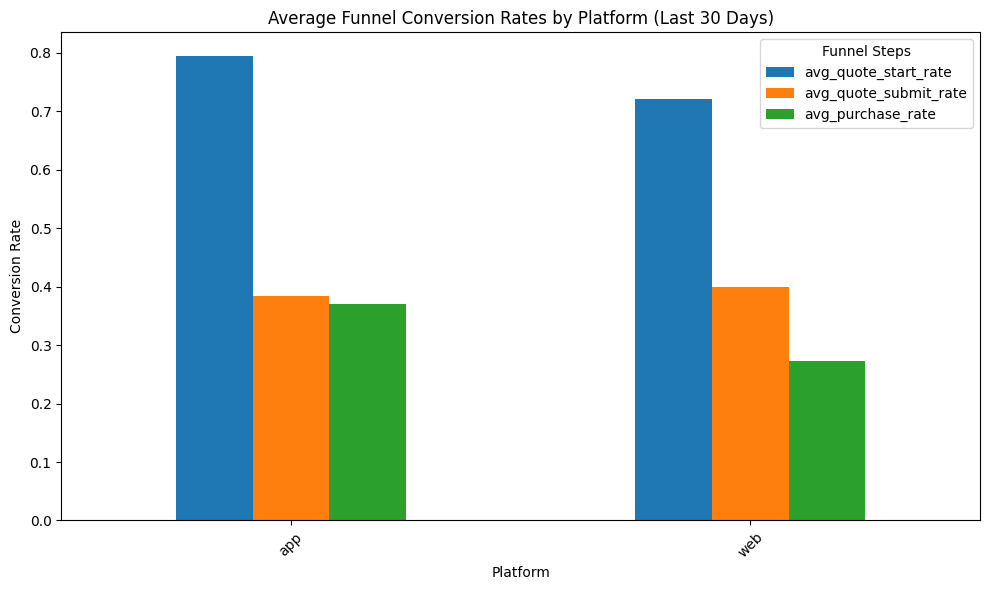

In [8]:
# use simple bar graph to plot dataframe
import matplotlib.pyplot as plt

# Create a sample DataFrame
#data = {'Category': ['A', 'B', 'C', 'D'],
#        'Value1': [10, 15, 8, 12],
#        'Value2': [7, 11, 14, 9],
#        'Value3': [13, 9, 10, 16],
#        'Value4': [6, 18, 5, 11]}
#df = pd.DataFrame(data)

# Plotting the four columns as grouped bars
pandas_df.plot(x='platform', y=['avg_quote_start_rate', 'avg_quote_submit_rate', 'avg_purchase_rate'], kind='bar', figsize=(10, 6))
plt.title('Average Funnel Conversion Rates by Platform (Last 30 Days)')
plt.xlabel('Platform')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend(title='Funnel Steps')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()